In [6]:
# 📦 Importing Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# 📥 Load the updated Day 2 dataset
df = pd.read_csv("C:/Users/kondu/Downloads/Day(2)/day2_updated_mental_health.xls")

# 🔄 Encode categorical columns if they exist
target_cols = ['Gender', 'Country', 'JobRole', 'Department', 'RemoteWork',
               'HasMentalHealthSupport', 'HasTherapyAccess', 'SalaryRange']
cols_to_encode = [col for col in target_cols if col in df.columns]
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# 🔢 Convert BurnoutRisk to numeric
if df['BurnoutRisk'].dtype == 'object':
    df['BurnoutRisk'] = df['BurnoutRisk'].map({'Low': 0, 'High': 1})
df['BurnoutRisk'] = df['BurnoutRisk'].astype(int)

# 🎯 Define X and y
X = df.drop(columns=['BurnoutLevel', 'BurnoutRisk', 'EmployeeID'], errors='ignore')
y = df['BurnoutRisk']

# 📊 Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Logistic Regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# 📈 LDA Model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# 🧮 Evaluation
print("\n🔍 Logistic Regression")
print("Accuracy:", round(accuracy_score(y_test, y_pred_logreg), 4))
print("ROC-AUC :", round(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

print("\n🔍 Linear Discriminant Analysis (LDA)")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lda), 4))
print("ROC-AUC :", round(roc_auc_score(y_test, lda.predict_proba(X_test)[:, 1]), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))

# 💾 Save predictions to CSV
results_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'LogReg_Pred': y_pred_logreg,
    'LDA_Pred': y_pred_lda
})
results_df.to_csv("day3_predictions.csv", index=False)
print("\n✅ Predictions saved as 'day3_predictions.csv'")



🔍 Logistic Regression
Accuracy: 0.4683
ROC-AUC : 0.4633
Confusion Matrix:
 [[190 209]
 [110  91]]

🔍 Linear Discriminant Analysis (LDA)
Accuracy: 0.665
ROC-AUC : 0.465
Confusion Matrix:
 [[399   0]
 [201   0]]

✅ Predictions saved as 'day3_predictions.csv'


C:\Users\kondu\AppData\Local\Temp\ipykernel_35136\1037820618.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\kondu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


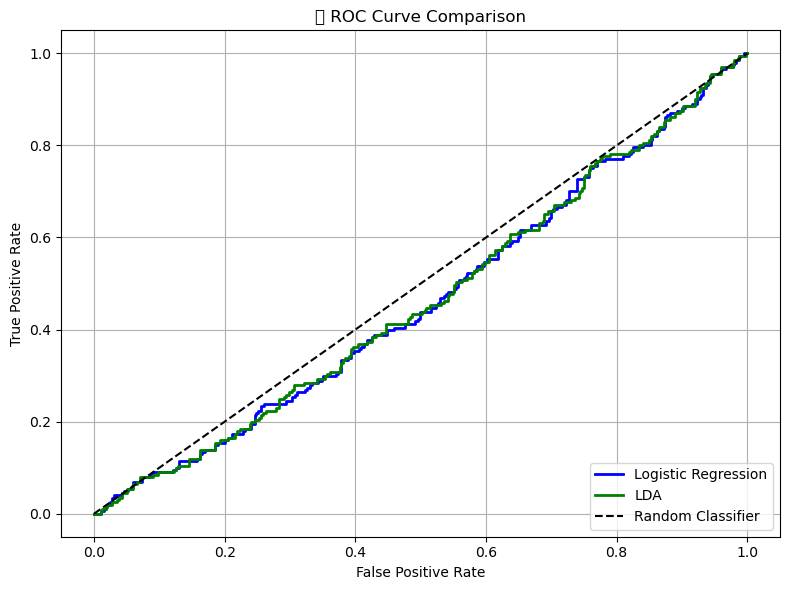

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
log_probs = logreg.predict_proba(X_test)[:, 1]
lda_probs = lda.predict_proba(X_test)[:, 1]

# Compute ROC curve coordinates
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression", color='blue', linewidth=2)
plt.plot(fpr_lda, tpr_lda, label="LDA", color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Diagonal line

# Formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📊 ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
